In [1]:
# importing the required libraries
import sqlite3
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect("../data/bootcamp_db")
conn

In [3]:
# checking the table
query="""select *
         from online_transactions_fixed
"""

In [4]:
online_trans = pd.read_sql(query,conn)

In [5]:
online_trans.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,total_order_value
0,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01T09:02:00,2.55,u1785,United Kingdom,15.30
1,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01T09:41:00,2.95,u15311,United Kingdom,2.95
2,536381,22438,BALLOON ART MAKE YOUR OWN FLOWERS,1,2010-12-01T09:41:00,1.95,u15311,United Kingdom,1.95
3,536384,22189,CREAM HEART CARD HOLDER,4,2010-12-01T09:53:00,3.95,u18074,United Kingdom,15.80
4,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,2010-12-01T10:03:00,5.45,u12431,Australia,32.70


In [6]:
# Checking for the rows and columns
online_trans.shape

(399841, 9)

In [7]:
# Checking the information of the table
online_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399841 entries, 0 to 399840
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   invoice            399841 non-null  object 
 1   stock_code         399841 non-null  object 
 2   description        399841 non-null  object 
 3   quantity           399841 non-null  int64  
 4   invoice_date       399841 non-null  object 
 5   price              399841 non-null  float64
 6   customer_id        399841 non-null  object 
 7   country            399841 non-null  object 
 8   total_order_value  399841 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 27.5+ MB


In [8]:
#finding the unique customers
print("Number of  Unique Customers:", len(online_trans.customer_id.unique()))

Number of  Unique Customers: 4363


In [9]:
#finding the locations of customers
print("Customers from different Locations:", len(online_trans.country.unique()))

Customers from different Locations: 37


In [10]:
#Finding the value counts
online_trans.country.value_counts()

country
United Kingdom          356158
Germany                   9081
France                    8154
EIRE                      7469
Spain                     2463
Netherlands               2330
Belgium                   1971
Switzerland               1844
Portugal                  1427
Australia                 1256
Norway                    1060
Italy                      783
Channel Islands            755
Finland                    653
Cyprus                     608
Sweden                     436
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     247
Unspecified                241
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45


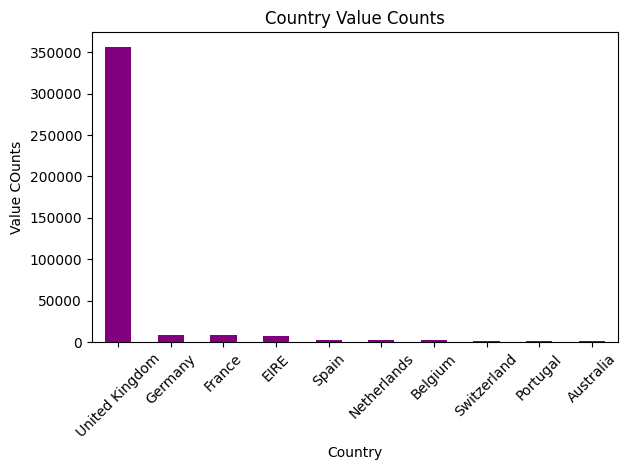

In [41]:
# Top 10 countries
online_trans.country.value_counts().nlargest(n=10).plot(kind='bar', color=('purple'));
plt.xlabel('Country')
plt.ylabel('Value Counts')
plt.title('Top 10 Country Value Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### We could see Uk has the most customers. There is a huge difference for the second most 

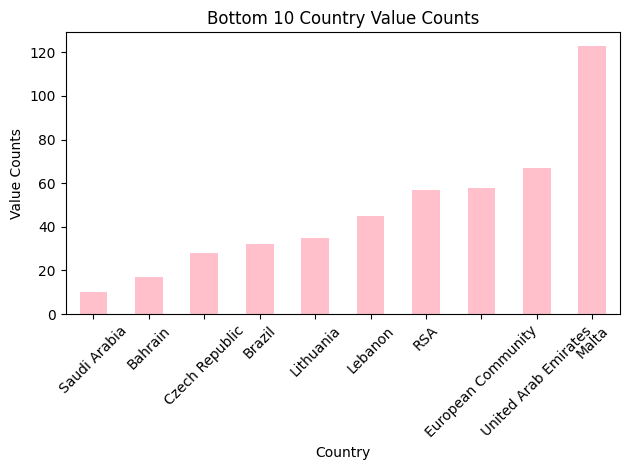

In [43]:
#Last 10 countries
online_trans.country.value_counts().nsmallest(n = 10).plot(kind = 'bar',color=('pink'));
plt.xlabel('Country')
plt.ylabel('Value Counts')
plt.title('Bottom 10 Country Value Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### We could see the least customers from Saudi Arabia

In [13]:
online_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399841 entries, 0 to 399840
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   invoice            399841 non-null  object 
 1   stock_code         399841 non-null  object 
 2   description        399841 non-null  object 
 3   quantity           399841 non-null  int64  
 4   invoice_date       399841 non-null  object 
 5   price              399841 non-null  float64
 6   customer_id        399841 non-null  object 
 7   country            399841 non-null  object 
 8   total_order_value  399841 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 27.5+ MB


#### Here we see the invoice_date is object. Need to change to date time

In [14]:

online_trans.invoice_date = pd.to_datetime(online_trans.invoice_date)

In [15]:
online_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399841 entries, 0 to 399840
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            399841 non-null  object        
 1   stock_code         399841 non-null  object        
 2   description        399841 non-null  object        
 3   quantity           399841 non-null  int64         
 4   invoice_date       399841 non-null  datetime64[ns]
 5   price              399841 non-null  float64       
 6   customer_id        399841 non-null  object        
 7   country            399841 non-null  object        
 8   total_order_value  399841 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.5+ MB


### Now the invoice_date is changed to datetime. Now let us look athe invoices per month


In [16]:
query = """
select cast(strftime('%m', invoice_date) as int) as invoice_month,
       case strftime('%m', invoice_date) 
           when '01' then 'Jan'
           when '02' then 'Feb'
           when '03' then 'Mar'
           when '04' then 'Apr'
           when '05' then 'May'
           when '06' then 'Jun'
           when '07' then 'Jul'
           when '08' then 'Aug'
           when '09' then 'Sep'
           when '10' then 'Oct'
           when '11' then 'Nov'
           when '12' then 'Dec'
           else 'error'
        end as invoice_month_name,
        sum(total_order_value) as total_spend
from online_transactions_fixed
where cast(strftime('%Y', invoice_date) as int) = '2011'
group by invoice_month, invoice_month_name
"""

invoices_per_month = pd.read_sql(query, conn)
invoices_per_month

,invoice_month,invoice_month_name,total_spend
0,1,Jan,471580.34
1,2,Feb,434218.17
2,3,Mar,573838.05
3,4,Apr,421527.77
4,5,May,650735.39
5,6,Jun,641129.21
6,7,Jul,580714.73
7,8,Aug,612966.30
8,9,Sep,924390.57
9,10,Oct,965151.25


In [17]:
invoices_per_month = invoices_per_month.sort_values(by="total_spend", ascending=False)
invoices_per_month

,invoice_month,invoice_month_name,total_spend
10,11,Nov,1118870.46
9,10,Oct,965151.25
8,9,Sep,924390.57
4,5,May,650735.39
5,6,Jun,641129.21
7,8,Aug,612966.30
6,7,Jul,580714.73
2,3,Mar,573838.05
0,1,Jan,471580.34
1,2,Feb,434218.17


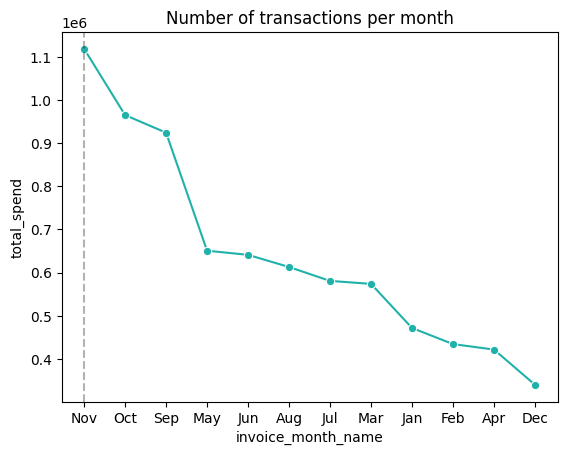

In [18]:
sns.lineplot(x="invoice_month_name", y="total_spend", data=invoices_per_month, marker = "o", color = "lightseagreen")
plt.title("Number of transactions per month");
plt.axvline('Nov', color = "k", linestyle = '--', alpha = 0.3)
#plt.text(9.5, 675000, "Most Transactions", size = 6.5, color = 'red');

In [19]:
# Convert 'invoice_date' column to datetime if it's not already in datetime format
online_trans['invoice_date'] = pd.to_datetime(online_trans['invoice_date'])

# Filter transactions for November
transactions_november = online_trans[(online_trans['invoice_date'].dt.month == 11)]

# Calculate total order value for November
total_order_value_november = (transactions_november['quantity'] * transactions_november['price']).sum()

print("Total order value for November:", total_order_value_november)

Total order value for November: 1118870.46


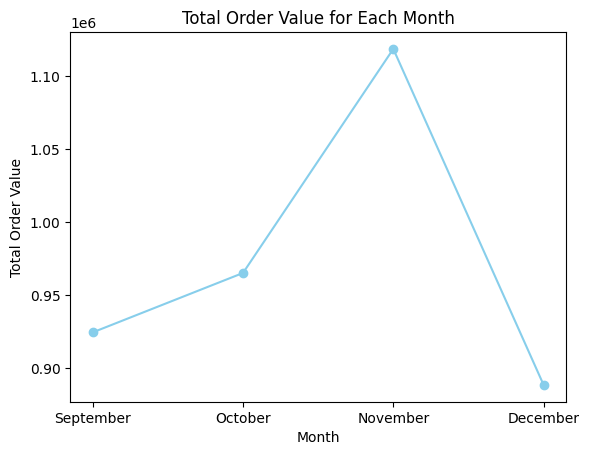

In [20]:
months = ['September', 'October', 'November','December']
total_order_values = [(online_trans[online_trans['invoice_date'].dt.month == month]['quantity'] * online_trans[online_trans['invoice_date'].dt.month == month]['price']).sum() for month in [9, 10, 11,12]]

# Plot the line plot
plt.plot(months, total_order_values, marker='o', color='skyblue', linestyle='-')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Order Value')
plt.title('Total Order Value for Each Month')

# Show the plot
plt.show()

#### We can see November has the highest sales followed by October and September.December has the lowest sales. Let us see why december has the lowest sales

In [21]:
# Filter transactions for December 2011
invoices_dec_2011 = online_trans[(online_trans['invoice_date'].dt.year == 2011) & (online_trans['invoice_date'].dt.month == 12)]
invoices_dec_2011_subset = invoices_dec_2011[['customer_id', 'invoice_date']]
print("Invoices for December 2011 (Customer ID and InvoiceDate):")
print(invoices_dec_2011_subset)
# Display the invoices for December 2011
#print("Invoices for December 2011:")
#print(invoices_dec_2011)

Invoices for December 2011 (Customer ID and InvoiceDate):
       customer_id        invoice_date
254515      u15687 2011-12-01 08:33:00
254516      u15951 2011-12-01 08:34:00
254517      u12569 2011-12-01 08:35:00
254518      u17049 2011-12-01 08:43:00
254519      u14911 2011-12-01 08:52:00
...            ...                 ...
399836      u17581 2011-12-09 12:19:00
399837      u17581 2011-12-09 12:19:00
399838      u12748 2011-12-09 12:20:00
399839      u13777 2011-12-09 12:25:00
399840      u15804 2011-12-09 12:31:00

[17314 rows x 2 columns]


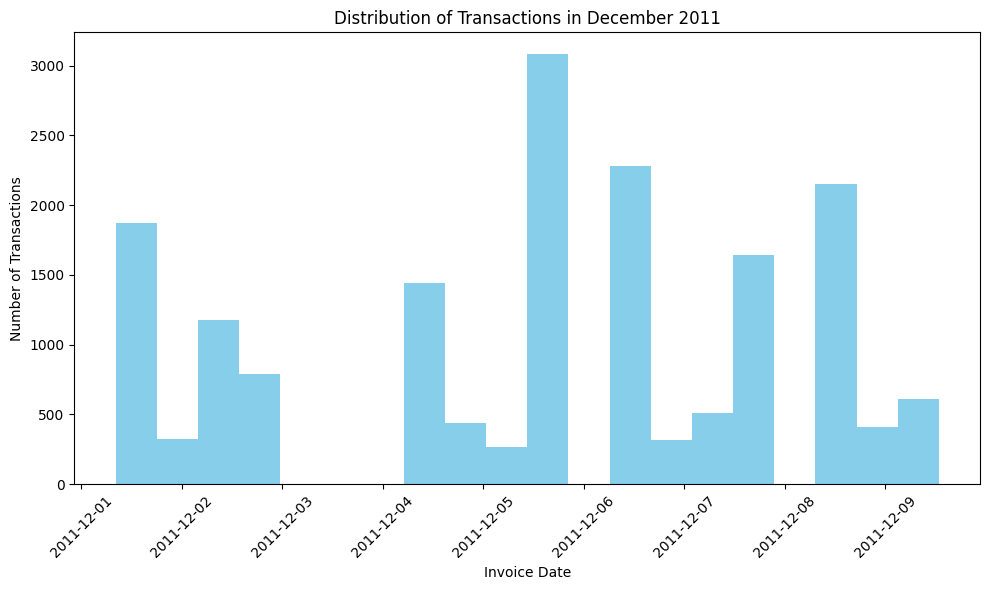

In [22]:
# Plot histogram of invoice dates for December 2011
plt.figure(figsize=(10, 6))
plt.hist(invoices_dec_2011_subset['invoice_date'], bins=20, color='skyblue')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions in December 2011')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Filter transactions for December
december_transactions = online_trans[(online_trans['invoice_date'].dt.year == 2011) & (online_trans['invoice_date'].dt.month == 12)]

# Get the minimum and maximum invoice dates for December
min_invoice_date_december = december_transactions['invoice_date'].min()
max_invoice_date_december = december_transactions['invoice_date'].max()

print("Minimum invoice date for December:", min_invoice_date_december)
print("Maximum invoice date for December:", max_invoice_date_december)

Minimum invoice date for December: 2011-12-01 08:12:00
Maximum invoice date for December: 2011-12-09 12:50:00


#### We can infer that the December has only 9 working days and thus has lowest sales. November,October and September has the highest sales due to the festive months <font color='red'>

In [ ]:
#### <font color ='red'> Let us see top 10 customers

In [24]:

top10_cust = online_trans.groupby(['customer_id'])['total_order_value'].sum().sort_values(ascending=False)[:10]
top10_cust

customer_id
u14646    278778.02
u18102    259657.30
u1745     189575.53
u14911    132893.24
u12415    123638.18
u14156    114335.77
u17511     88138.20
u16684     65920.12
u14096     65164.79
u13694     62961.54
Name: total_order_value, dtype: float64

In [25]:
top10_cust = online_trans.groupby(['customer_id','country'])['total_order_value'].sum().sort_values(ascending=False)[:10]
top10_cust

customer_id  country       
u14646       Netherlands       278778.02
u18102       United Kingdom    259657.30
u1745        United Kingdom    189575.53
u14911       EIRE              132893.24
u12415       Australia         123638.18
u14156       EIRE              114335.77
u17511       United Kingdom     88138.20
u16684       United Kingdom     65920.12
u14096       United Kingdom     65164.79
u13694       United Kingdom     62961.54
Name: total_order_value, dtype: float64

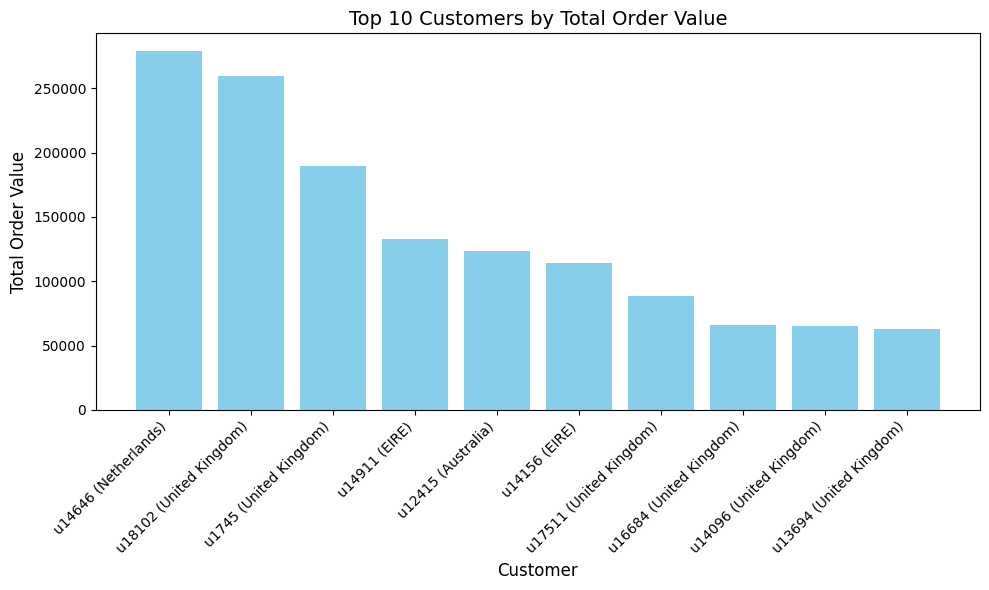

In [26]:
# Assuming top10_cust is a DataFrame with 'customer_id', 'country', and 'total_order_value' columns
top10_cust = online_trans.groupby(['customer_id', 'country'])['total_order_value'].sum().sort_values(ascending=False)[:10]

# Reset index to make 'customer_id' and 'country' as regular columns
top10_cust = top10_cust.reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top10_cust.index, top10_cust['total_order_value'], color='skyblue')
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Total Order Value', fontsize=12)
plt.title('Top 10 Customers by Total Order Value', fontsize=14)
plt.xticks(top10_cust.index, [f"{cust} ({country})" for cust, country in zip(top10_cust['customer_id'], top10_cust['country'])], rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### In the top 10 customers the majority is from UK. But the top  is from Netherlands.

In [27]:
#Average value for each customer
online_trans.groupby("customer_id")["total_order_value"].mean().sort_values(ascending = False)

customer_id
u15098    9904.875000
u15195    3861.000000
u13135    3096.000000
u16532    1687.200000
u15749    1435.726667
             ...     
u13829    -102.000000
u12666    -113.720000
u17307    -152.640000
u16742    -154.966667
u14213    -238.440000
Name: total_order_value, Length: 4363, dtype: float64

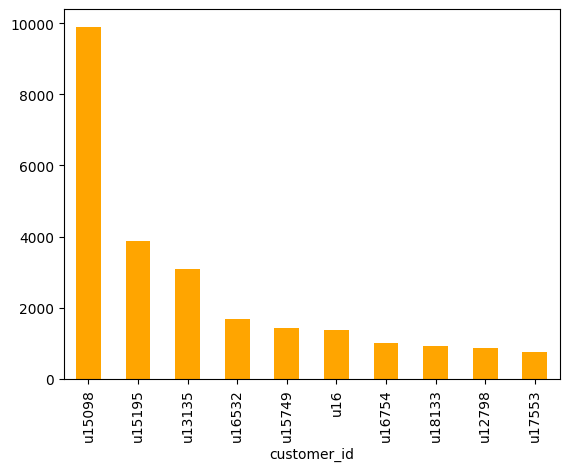

In [28]:
online_trans.groupby("customer_id")["total_order_value"].mean().sort_values(ascending = False).head(n = 10).plot(kind = 'bar',color='orange');

#### This shows the average amount spent by the top 10 customers

In [29]:
#top 10 products
top10_products = online_trans.groupby(['description'])['quantity'].sum().sort_values(ascending=False)[:10]
top10_products

description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
POPCORN HOLDER                        48689
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
CREAM HANGING HEART T-LIGHT HOLDER    34185
PACK OF 72 RETROSPOT CAKE CASES       33386
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
UNKNOWN                               25336
PACK OF 12 LONDON TISSUES             25305
Name: quantity, dtype: int64

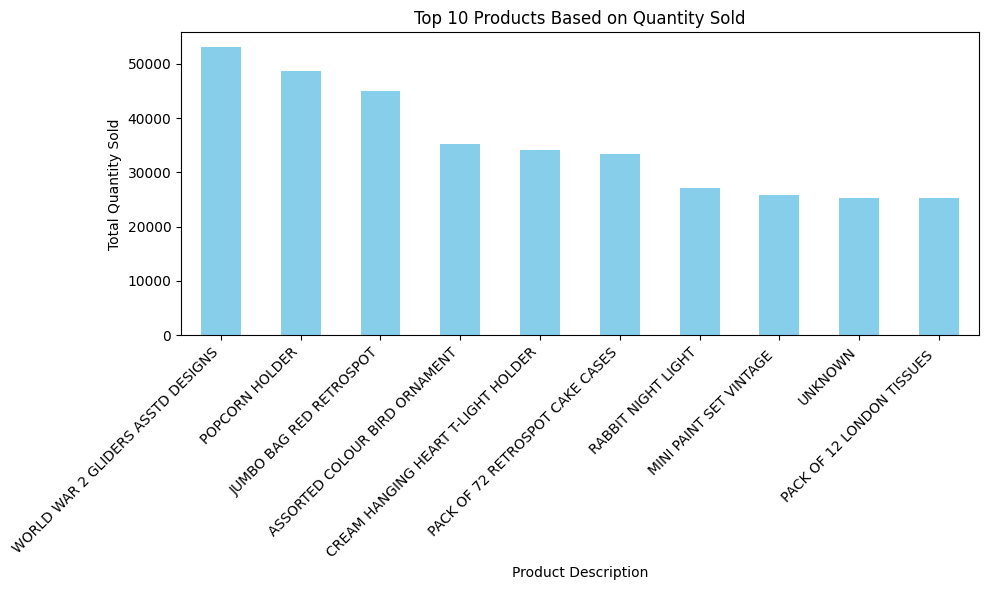

In [30]:
plt.figure(figsize=(10, 6))
top10_products.plot(kind='bar', color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products Based on Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Q4.1 Top 10 Countries by Quantity

online_trans.groupby("country")["quantity"].sum().sort_values(ascending = False).head(n = 10)

country
United Kingdom    3992342
Netherlands        200510
EIRE               136189
Germany            116235
France             109019
Australia           83643
Sweden              35594
Switzerland         29681
Spain               26611
Japan               25221
Name: quantity, dtype: int64

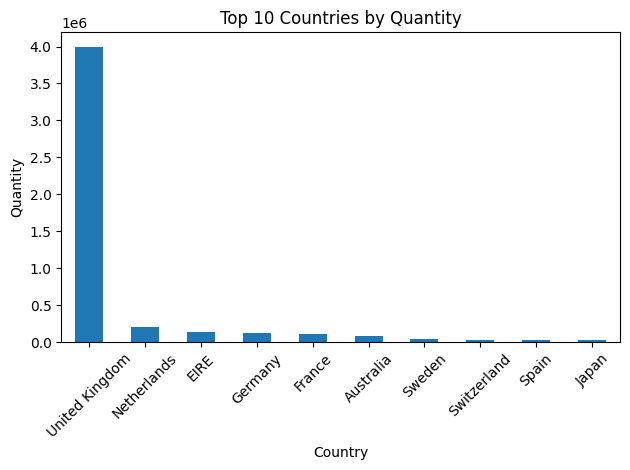

In [44]:
# Visualizing the top 10 Countries by Quantity

online_trans.groupby("country")["quantity"].sum().sort_values(ascending = False).head(n = 10).plot(kind = 'bar');
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Countries by Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

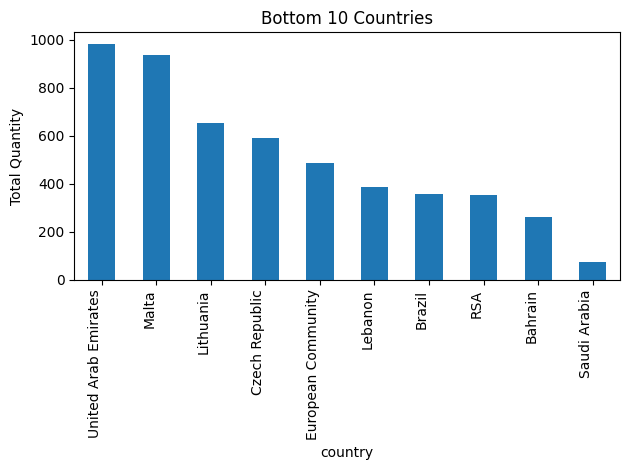

In [33]:
#Visualising bottom 10 countries
plt.xlabel('Countries')
plt.ylabel('Total Quantity')
plt.title('Bottom 10 Countries')
plt.xticks(rotation=45, ha='right')


online_trans.groupby("country")["quantity"].sum().sort_values(ascending = False).tail(n = 10).plot(kind = 'bar');
plt.tight_layout()
plt.show()

In [34]:
#### The above visualisations show the top 10 and bottom 10 countries. United 

In [35]:
# Getting the average sales of  countries 
#top10_cust = online_trans.groupby(['country']) ['total_order_value'].mean().sort_values(ascending=False)[:10]
top10_cust = online_trans.groupby(['country']) ['total_order_value'].mean().sort_values(ascending=False)
top10_cust

country
Netherlands             121.665039
Australia               109.014729
Japan                    99.774056
Sweden                   80.656904
Denmark                  48.112373
Lithuania                47.458857
Singapore                42.420419
Lebanon                  37.641778
Brazil                   35.737500
EIRE                     33.680208
Bahrain                  32.258824
Greece                   31.165634
Norway                   30.465057
Israel                   28.293117
Switzerland              28.123319
Finland                  28.029923
United Arab Emirates     27.832537
Channel Islands          26.591245
Czech Republic           23.990000
Iceland                  23.681319
Austria                  22.476279
France                   22.267788
Germany                  22.092243
Cyprus                   21.124605
Spain                    21.009602
Canada                   20.769600
Poland                   20.396250
European Community       19.840517
Italy       

In [36]:
# listing the countries by quantity
online_trans.groupby("country")["quantity"].mean().sort_values(ascending = False)

country
Netherlands             86.055794
Sweden                  81.637615
Japan                   71.045070
Australia               66.594745
Singapore               24.344186
Denmark                 21.725333
Czech Republic          21.142857
Lithuania               18.628571
Canada                  18.413333
EIRE                    18.233900
Norway                  18.103774
Finland                 16.194487
Israel                  16.141700
Switzerland             16.095987
Bahrain                 15.294118
United Arab Emirates    14.641791
Iceland                 13.505495
France                  13.370002
Germany                 12.799802
Channel Islands         12.547020
Austria                 12.377261
Belgium                 11.608321
United Kingdom          11.209469
Portugal                11.155571
Brazil                  11.125000
Greece                  10.915493
Poland                  10.845238
Spain                   10.804304
Cyprus                  10.353618
Italy 

####  We can see that UK has lot of customers but according to average sales and quantity Netherlands is more

#### let us see what products are sold most in Netherlands

In [37]:
transactions_netherlands = online_trans[online_trans['country'] == 'Netherlands']

top_products_netherlands = transactions_netherlands.groupby('description')['quantity'].sum()

# Get the top 10 products for the Netherlands
top10_products_netherlands = top_products_netherlands.nlargest(10)
print("Top 10 products for Netherlands:")
print(top10_products_netherlands)

Top 10 products for Netherlands:
description
RABBIT NIGHT LIGHT                     4801
SPACEBOY LUNCH BOX                     4528
DOLLY GIRL LUNCH BOX                   4132
PACK OF 72 RETROSPOT CAKE CASES        4128
ROUND SNACK BOXES SET OF4 WOODLAND     3132
RED TOADSTOOL LED NIGHT LIGHT          2388
WOODLAND CHARLOTTE BAG                 2310
RED RETROSPOT CHARLOTTE BAG            2100
5 HOOK HANGER RED MAGIC TOADSTOOL      2016
JUMBO BAG RED RETROSPOT                2000
Name: quantity, dtype: int64


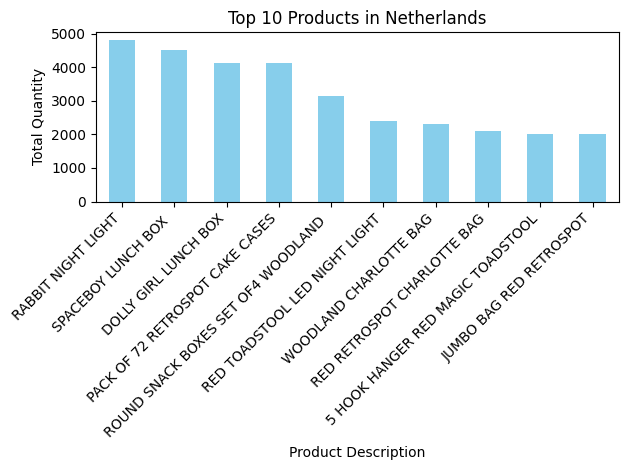

In [38]:
top10_products_netherlands.plot(kind='bar', color='skyblue')


plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.title('Top 10 Products in Netherlands')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
country_counts = online_trans['country'].value_counts()
print(country_counts)

country
United Kingdom          356158
Germany                   9081
France                    8154
EIRE                      7469
Spain                     2463
Netherlands               2330
Belgium                   1971
Switzerland               1844
Portugal                  1427
Australia                 1256
Norway                    1060
Italy                      783
Channel Islands            755
Finland                    653
Cyprus                     608
Sweden                     436
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     247
Unspecified                241
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45


#### This contains unique countries and the values represent the frequency of each country in the DataFrame.

#### A violin plot is a statistical visualization which combines aspects of a box plot and a kernel density plot to provide a more informative representation of the data distribution.

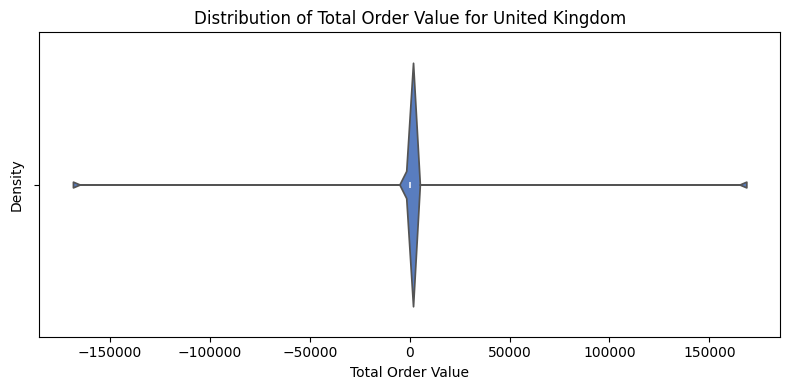

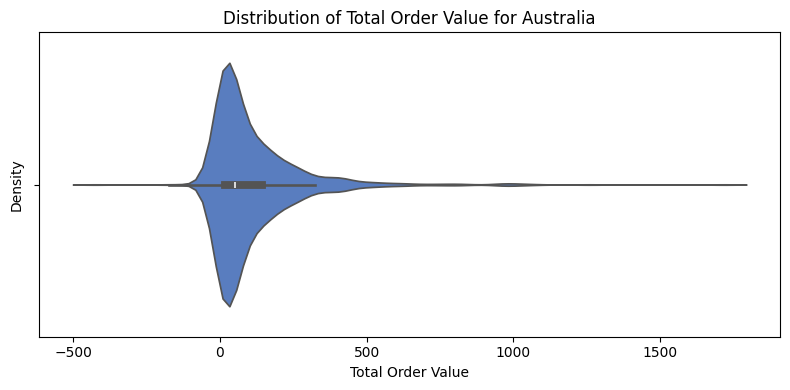

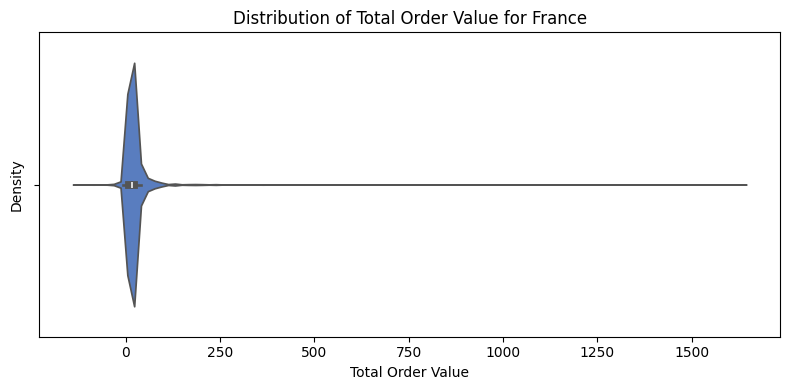

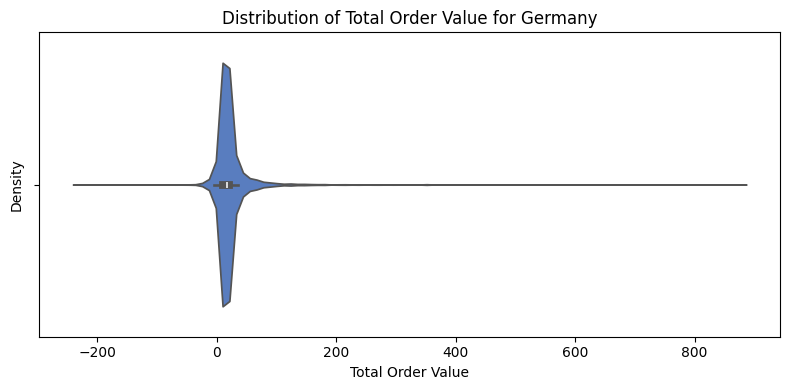

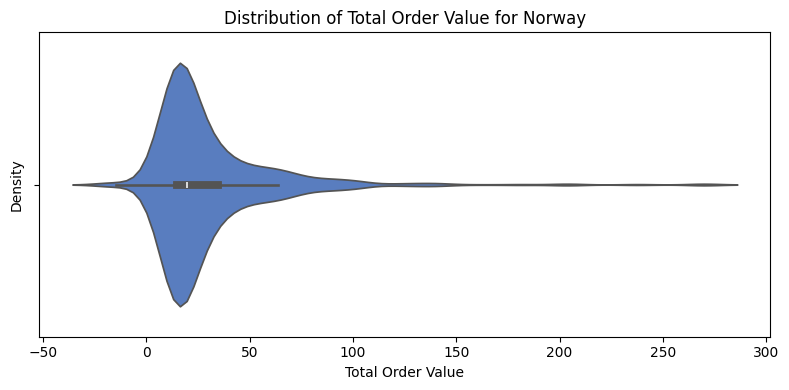

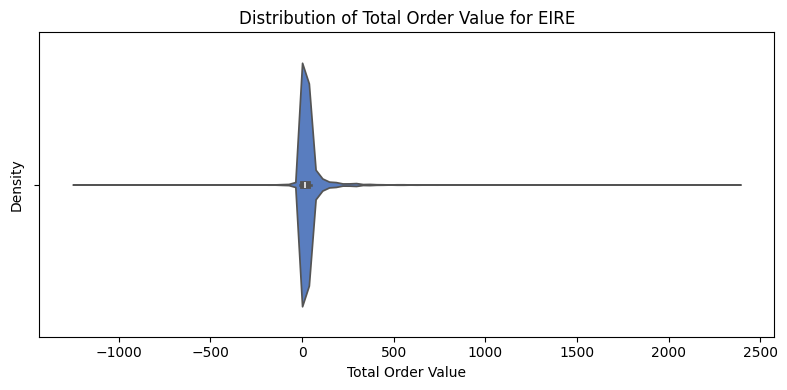

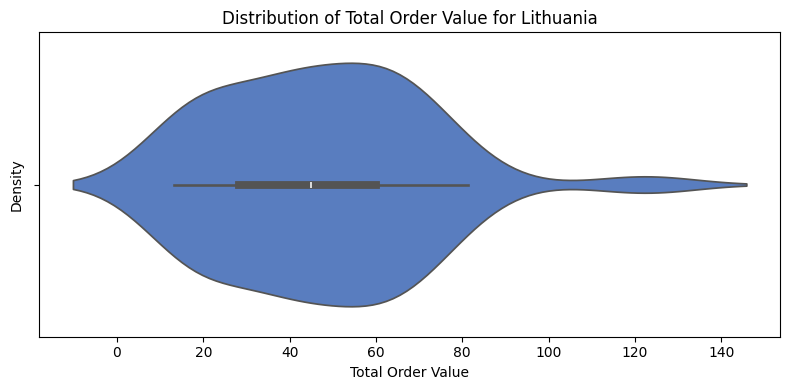

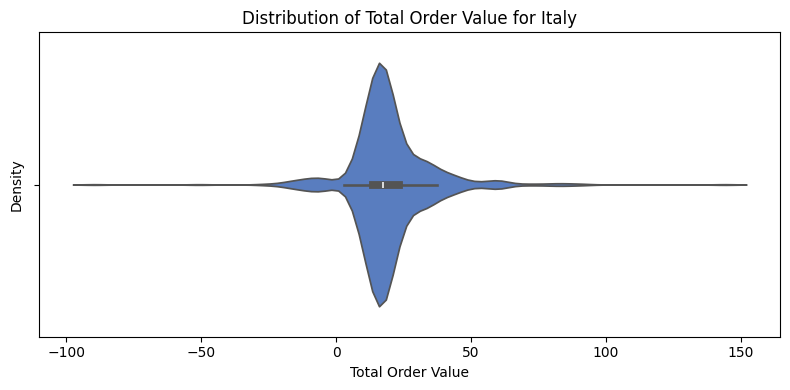

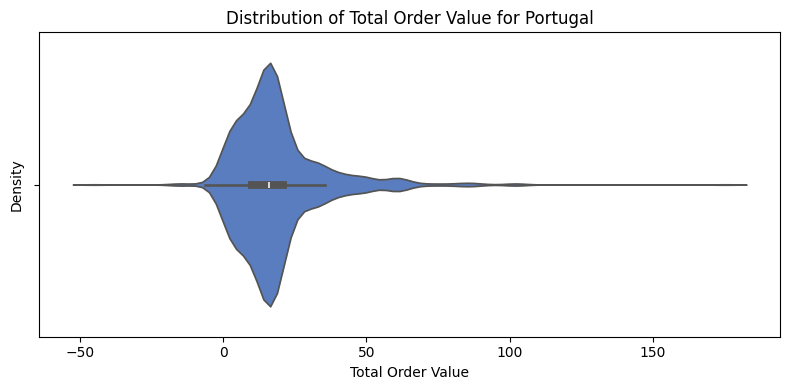

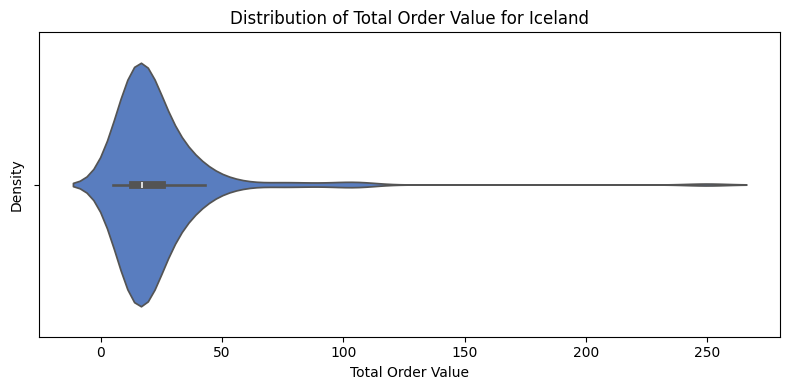

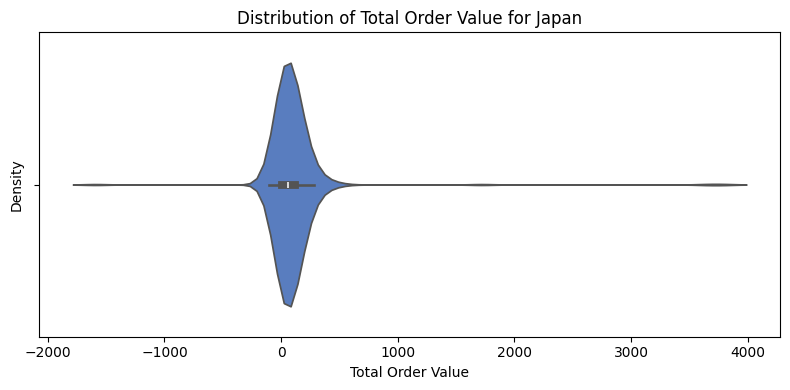

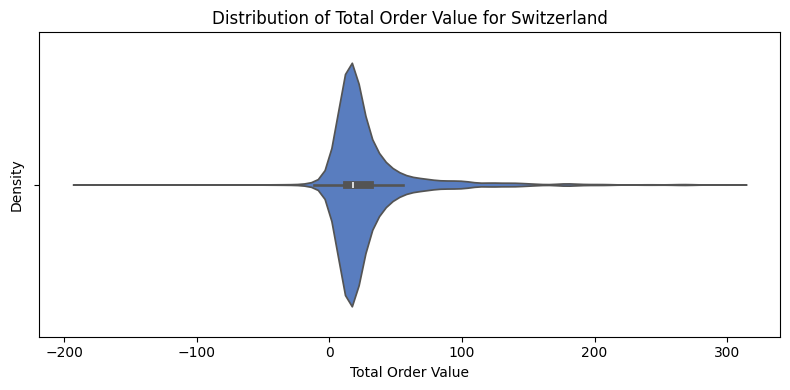

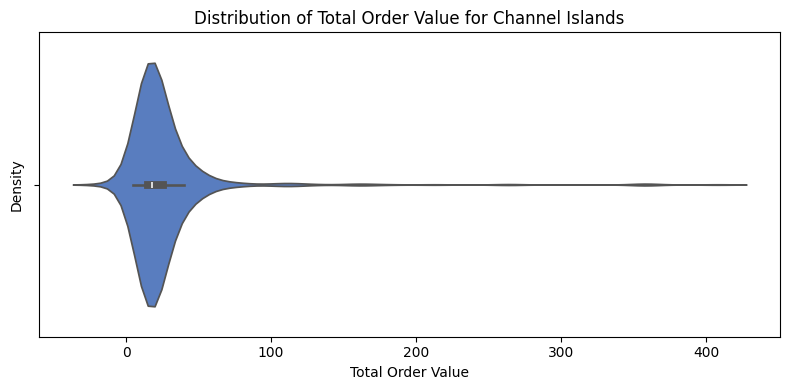

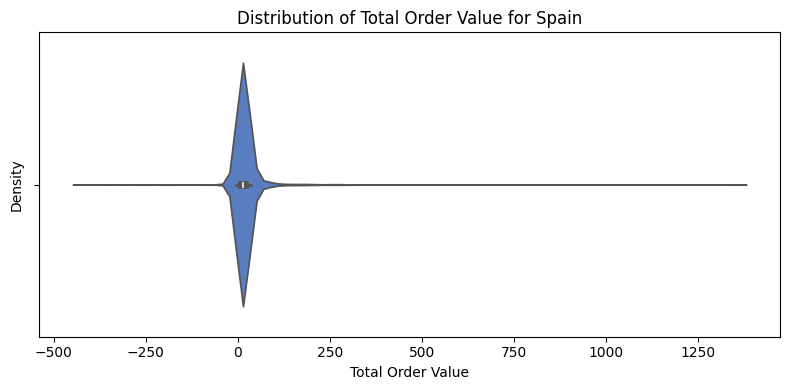

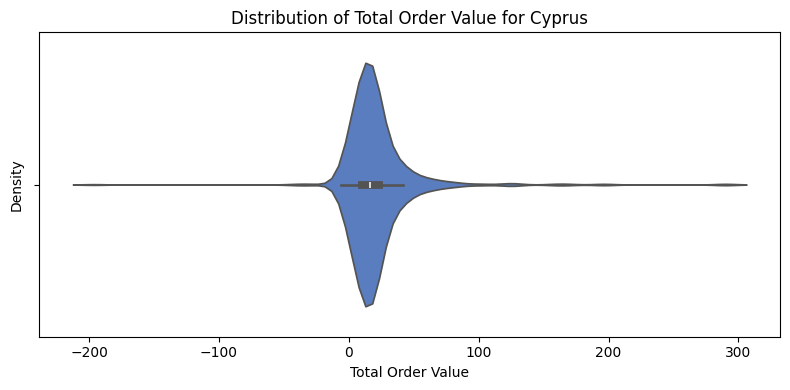

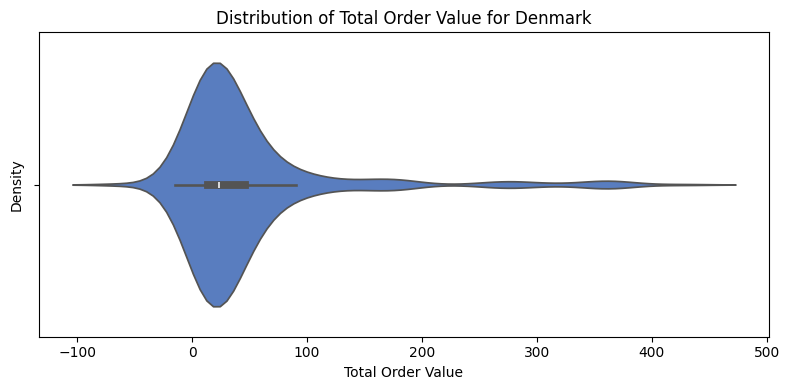

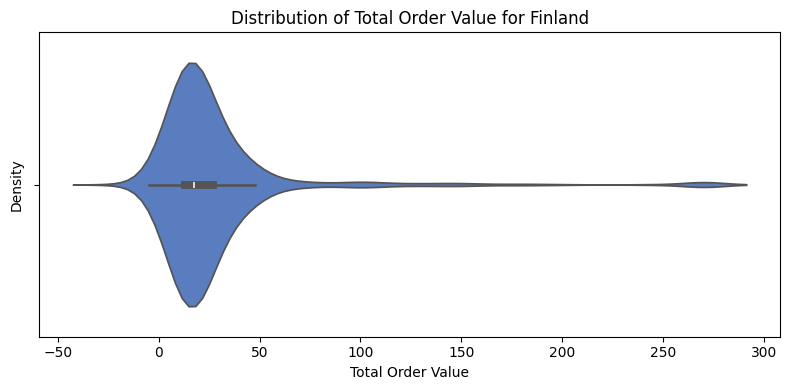

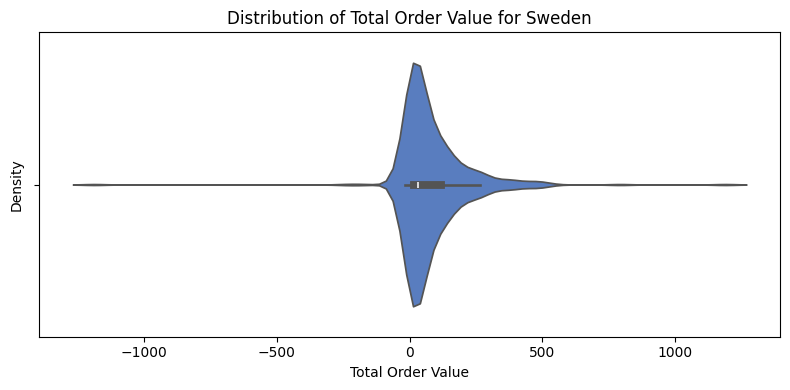

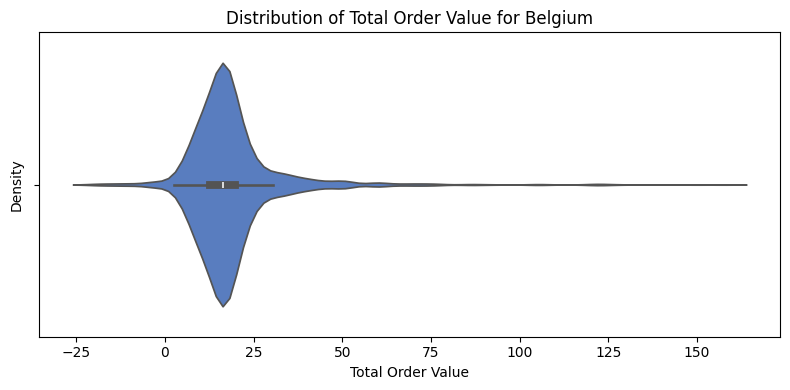

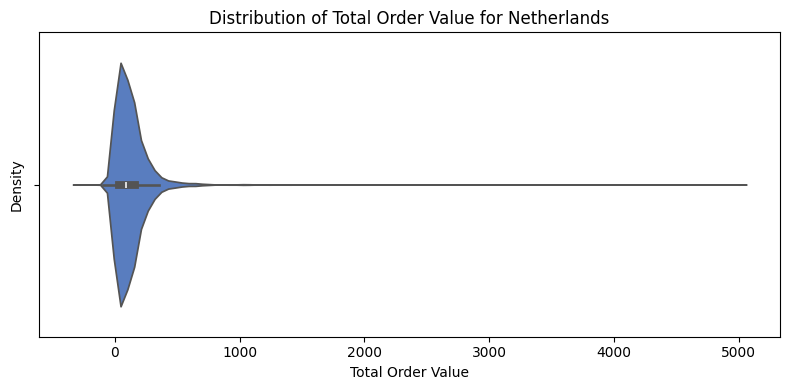

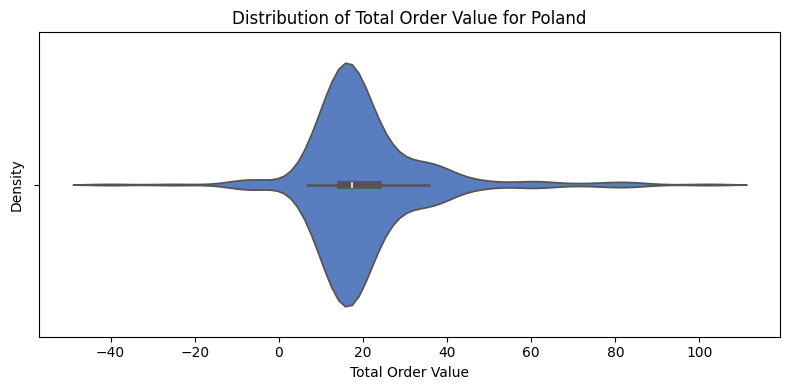

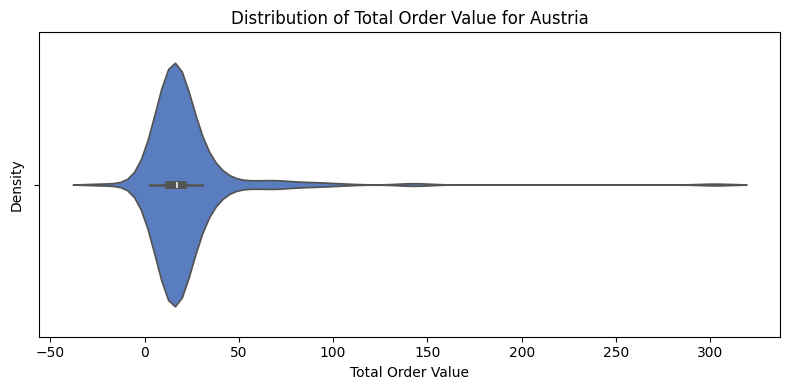

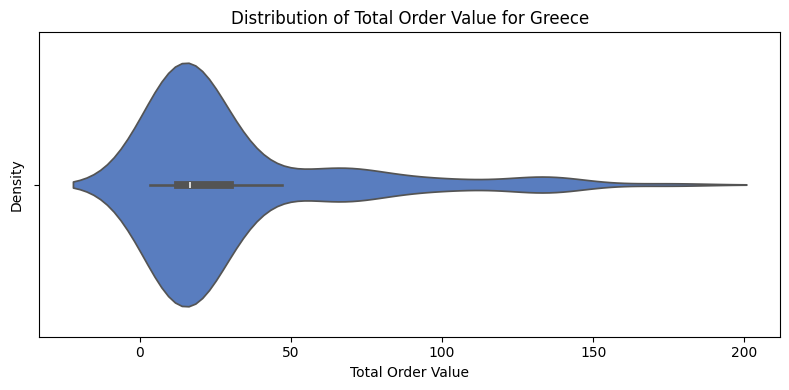

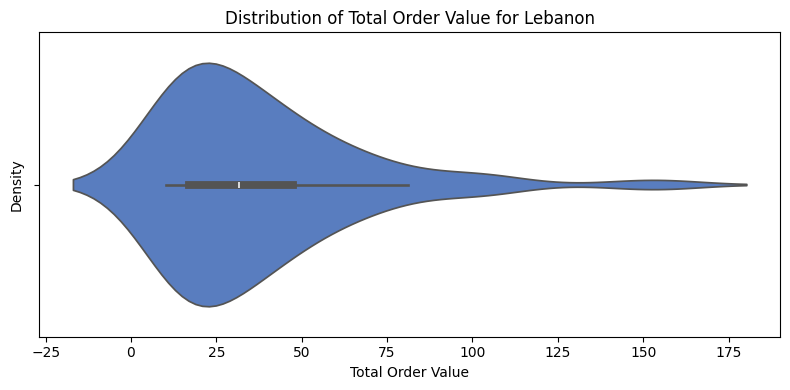

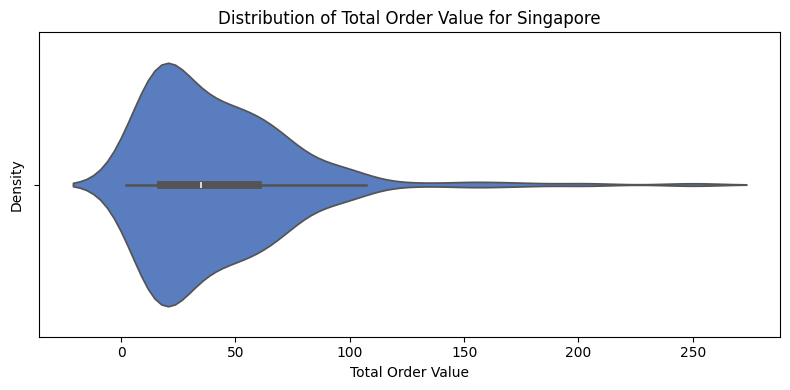

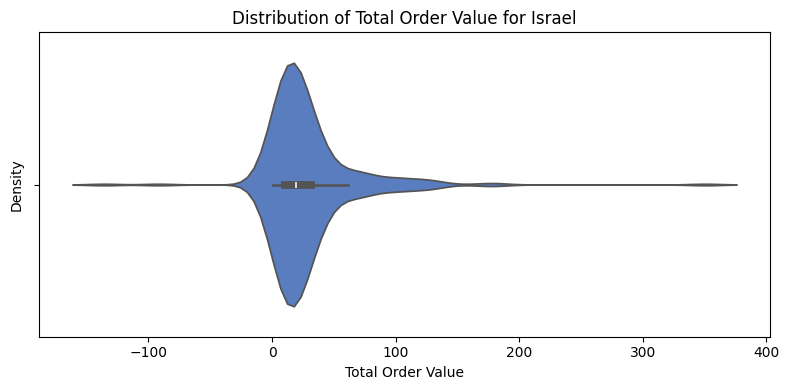

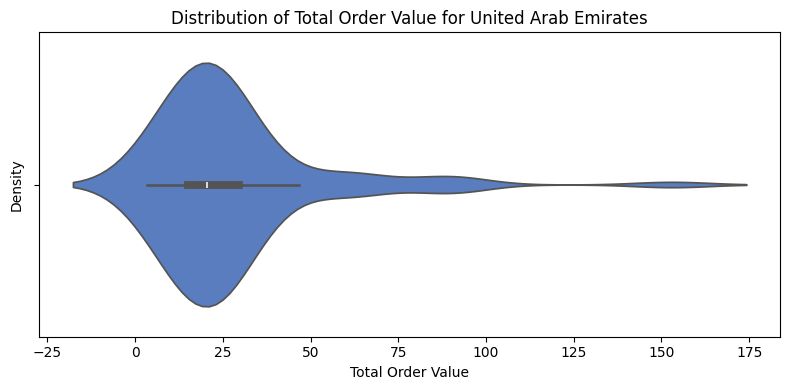

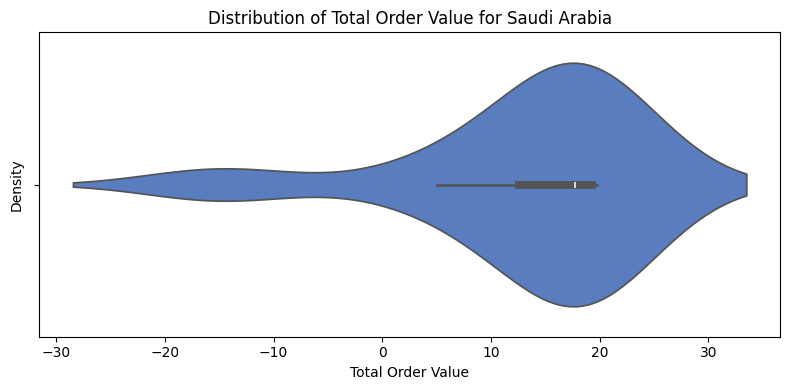

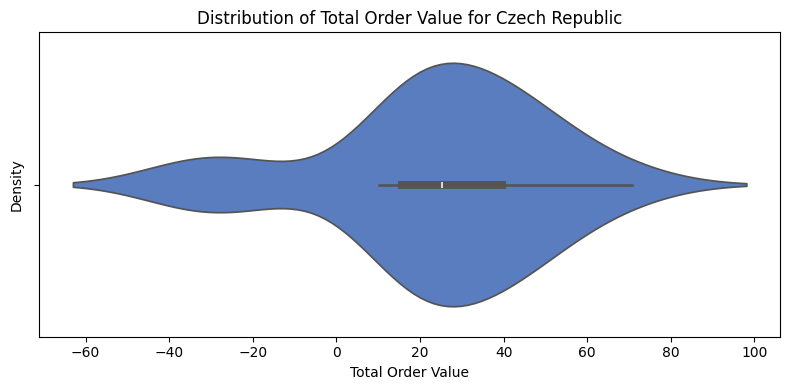

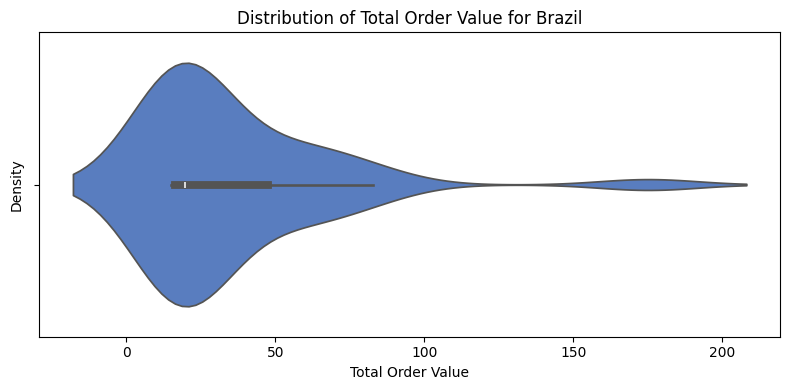

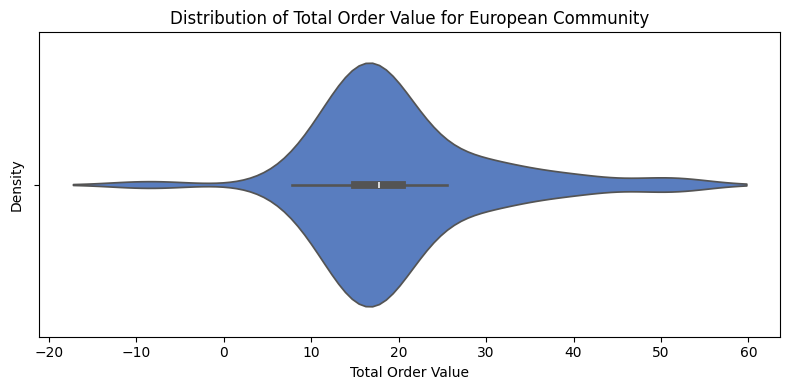

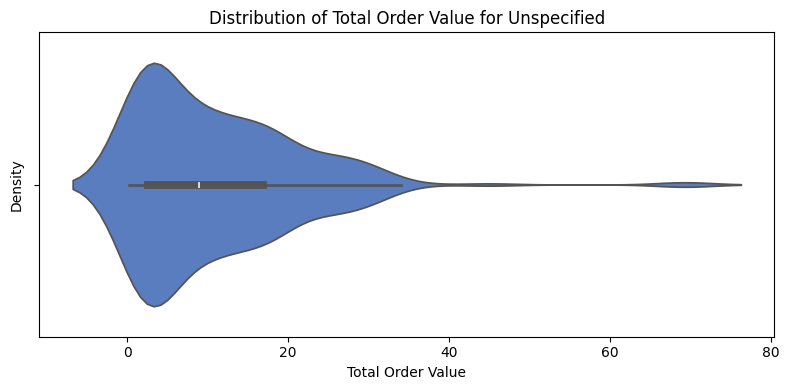

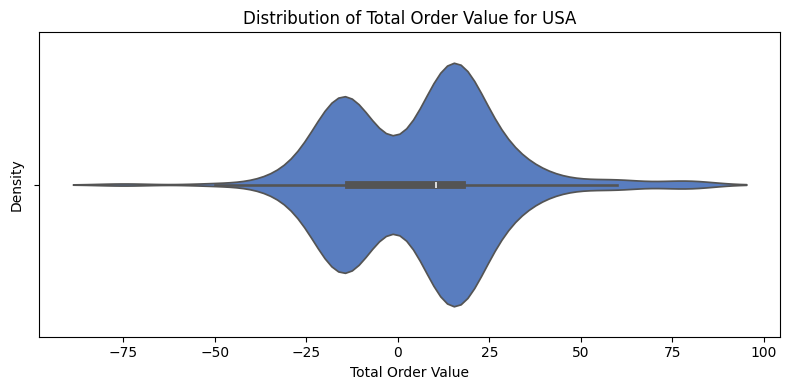

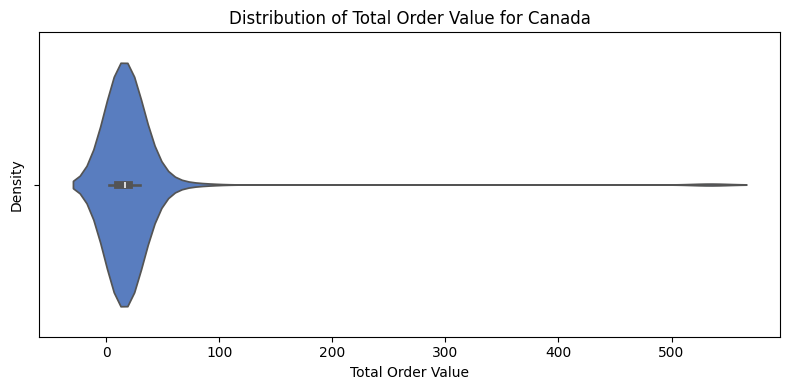

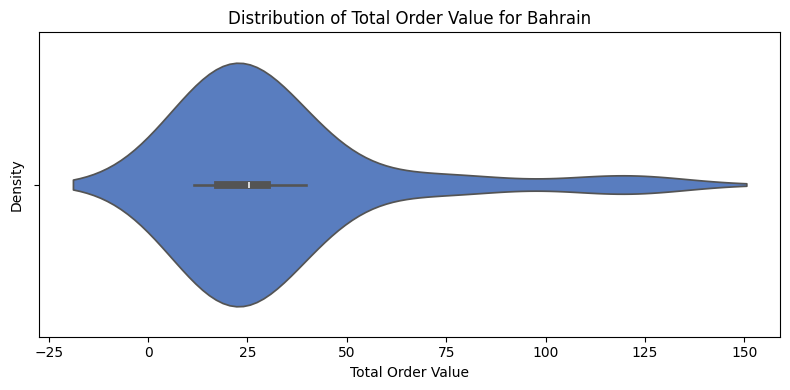

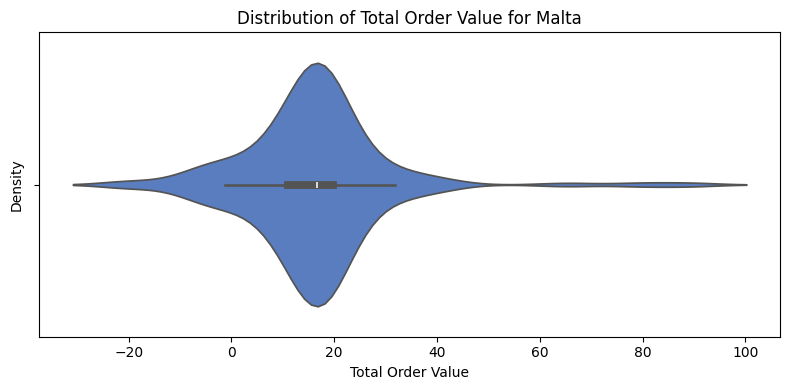

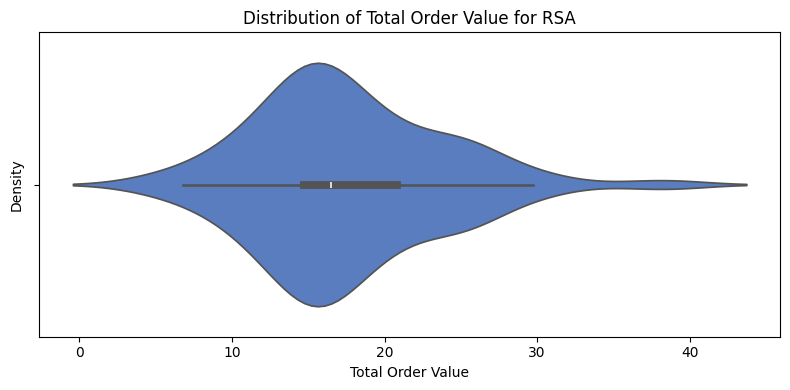

In [40]:
# Get unique countries
unique_countries = online_trans['country'].unique()

# Create a separate violin plot for each country
for country in unique_countries:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='total_order_value', data=online_trans[online_trans['country'] == country], palette='muted')
    plt.title(f'Distribution of Total Order Value for {country}')
    plt.xlabel('Total Order Value')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

#### <font color ='red'> Uk has the most customers and contributes to the major chunk of data
#### <font color ='red'> But Netherlands is top country in terms of quantiy and Total order value
#### <font color ='red'> The sales is mostly in September,October and November with sales peaking on November.
#### <font color ='red'> December has the least amount of Sales due to less working days